# Supervised learning methods are applied to the MNIST datasets

## 1. Load MNIST dataset
Dataset of MNIST images is loaded: two datasets for training and test ($N_{train}=60,000, N_{test}=10,000$).

In [31]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.datasets import fetch_openml
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import mnist

In [12]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
# load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# normalised the dataset
x_train, x_test = x_train / 255.0, x_test / 255.0 

In [13]:
x_train2, x_val = x_train[:50000], x_train[50000:]
y_train2, y_val = y_train[:50000], y_train[50000:]

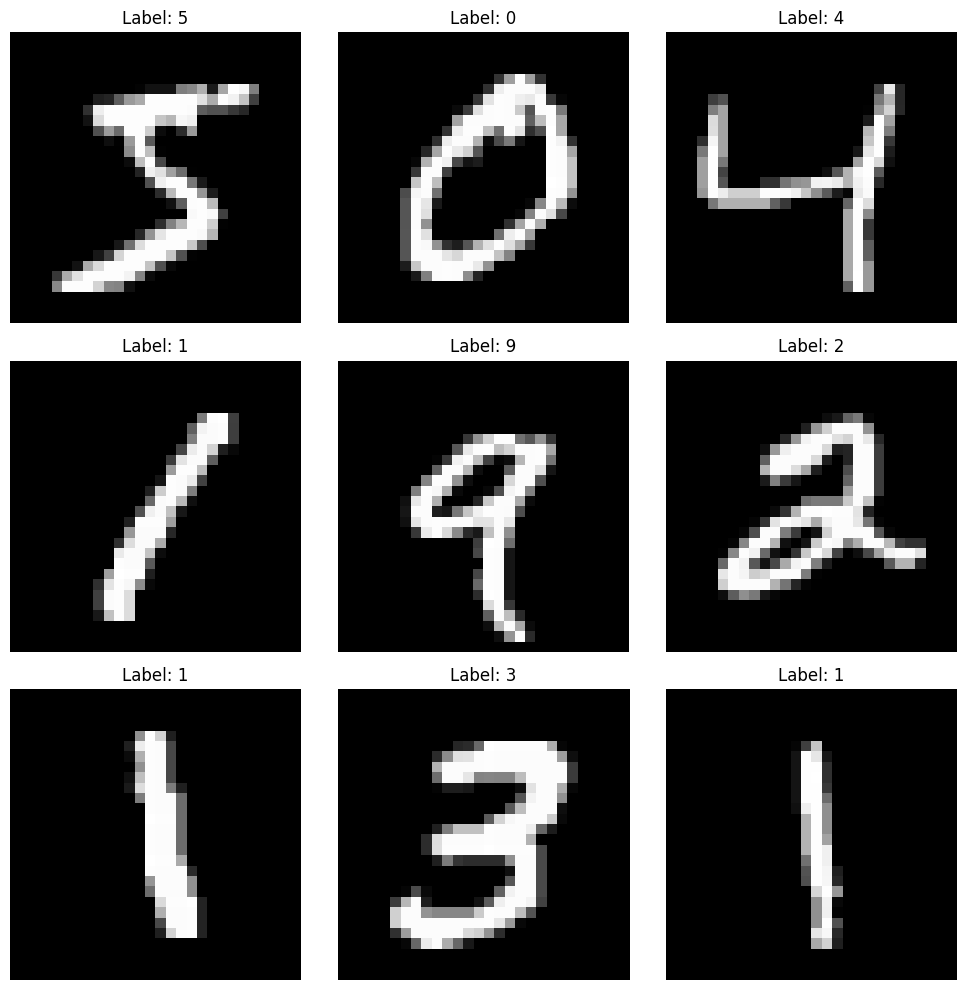

In [14]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i in range(3):
    for j in range(3):
        idx = i * 3 + j
        axes[i, j].imshow(x_train[idx], cmap='gray')
        axes[i, j].set_title(f"Label: {y_train[idx]}")
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

In [15]:
x_test_pr = x_test

In [29]:
x_train = x_train.reshape((x_train.shape[0], -1))
x_train2 = x_train2.reshape((x_train2.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))
x_val = x_val.reshape((x_val.shape[0],-1))

## 2. The Support Vector Machine (SVM) method with the best parameter search for $C$ and $\gamma$ 
First, the SVM method is performed and the optimal parameter $C$ and $\gamma$ are searched.

In [18]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

In [19]:
svc = svm.SVC()

In [24]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1]
}

In [27]:
grid = GridSearchCV(svc, param_grid, cv=3, n_jobs=-1, verbose=2)
grid.fit(x_val, y_val)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[CV] END ..................................C=0.1, gamma=0.01; total time=  54.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=  55.7s
[CV] END ..................................C=0.1, gamma=0.01; total time=  55.7s
[CV] END ...................................C=1, gamma=0.001; total time= 1.3min
[CV] END ...................................C=1, gamma=0.001; total time= 1.3min
[CV] END .................................C=0.1, gamma=0.001; total time= 2.3min
[CV] END .................................C=0.1, gamma=0.001; total time= 2.3min
[CV] END .................................C=0.1, gamma=0.001; total time= 2.3min
[CV] END ...................................C=0.1, gamma=0.1; total time= 2.6min
[CV] END ...................................C=0.1, gamma=0.1; total time= 2.6min
[CV] END ....................................C=1, gamma=0.01; total time=  25.4s
[CV] END ....................................C=1, gamma=0.01; total time=  25.9s
[CV] END ...................

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1]},
             verbose=2)

In [32]:
results_df = pd.DataFrame(grid.cv_results_)
print(results_df[['params', 'mean_test_score', 'rank_test_score']])

                       params  mean_test_score  rank_test_score
0  {'C': 0.1, 'gamma': 0.001}         0.835703                8
1   {'C': 0.1, 'gamma': 0.01}         0.918501                4
2    {'C': 0.1, 'gamma': 0.1}         0.301900                9
3    {'C': 1, 'gamma': 0.001}         0.911002                5
4     {'C': 1, 'gamma': 0.01}         0.950501                2
5      {'C': 1, 'gamma': 0.1}         0.858801                7
6   {'C': 10, 'gamma': 0.001}         0.932401                3
7    {'C': 10, 'gamma': 0.01}         0.959801                1
8     {'C': 10, 'gamma': 0.1}         0.866701                6


In [34]:
svc2 = svm.SVC(C=10,gamma=0.01)

In [35]:
svc2.fit(x_train2,y_train2)

SVC(C=10, gamma=0.01)

In [36]:
score = svc2.score(x_test, y_test)

In [43]:
print(score)

0.982


In [37]:
y_pred = svc2.predict(x_test)

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

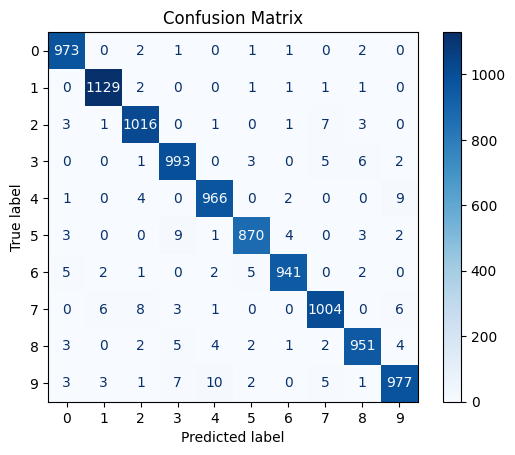

In [42]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

## 3. Perform the random forest method
The random forest method is performed with hyperparameter tunings 

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

In [48]:
rf = RandomForestClassifier(random_state=42)

In [49]:
grid = GridSearchCV(rf, param_grid, cv=3, n_jobs=-1, verbose=2)
grid.fit(x_val, y_val)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   1.8s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   1.9s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   2.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   3.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   3.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   3.5s
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time=   1.6s
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time=   1.5s
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time=   1.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   6.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   6.4s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   3.1s
[CV] END m

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [50]:
results_df = pd.DataFrame(grid.cv_results_)
print(results_df[['params', 'mean_test_score', 'rank_test_score']])

                                               params  mean_test_score  \
0   {'max_depth': None, 'min_samples_split': 2, 'n...         0.939701   
1   {'max_depth': None, 'min_samples_split': 2, 'n...         0.942401   
2   {'max_depth': None, 'min_samples_split': 2, 'n...         0.944601   
3   {'max_depth': None, 'min_samples_split': 5, 'n...         0.936401   
4   {'max_depth': None, 'min_samples_split': 5, 'n...         0.941001   
5   {'max_depth': None, 'min_samples_split': 5, 'n...         0.943401   
6   {'max_depth': 10, 'min_samples_split': 2, 'n_e...         0.929401   
7   {'max_depth': 10, 'min_samples_split': 2, 'n_e...         0.935701   
8   {'max_depth': 10, 'min_samples_split': 2, 'n_e...         0.937401   
9   {'max_depth': 10, 'min_samples_split': 5, 'n_e...         0.932001   
10  {'max_depth': 10, 'min_samples_split': 5, 'n_e...         0.934601   
11  {'max_depth': 10, 'min_samples_split': 5, 'n_e...         0.934801   
12  {'max_depth': 20, 'min_samples_spl

In [52]:
rf2 = RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)

In [53]:
rf2.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)

In [57]:
score = rf2.score(x_test, y_test)
print(score)

0.9691


In [54]:
y_pred = rf2.predict(x_test)

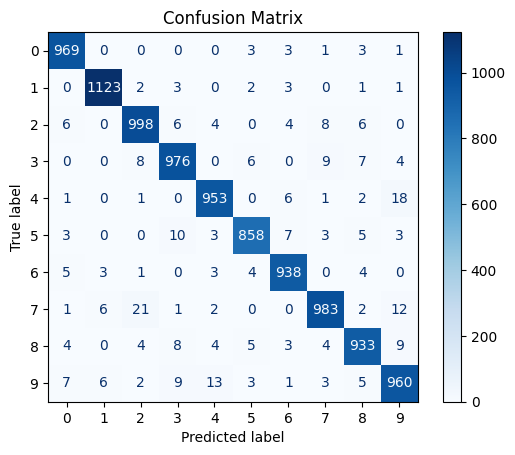

In [55]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()